In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion  
    with open(filename) as training_file:
        ### START CODE HERE
        
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')

        ### END CODE HERE
    return images, labels


training_images, training_labels = get_data('./sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 177MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 128MB/s]
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
training_images = np.expand_dims(training_images, axis=3) ### YOUR CODE HERE
testing_images = np.expand_dims(testing_images, axis=3) ### YOUR CODE HERE

train_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )


validation_datagen = ImageDataGenerator(
    ### YOUR CODE HERE
    rescale=1. / 255
    )

# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
    ### START CODE HERE                                
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)]
    ### END CODE HERE
    )

model.compile(optimizer = tf.optimizers.Adam(), ### YOUR CODE HERE)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32), ### YOUR CODE HERE)
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/15
857/857 [==============================] - 19s 12ms/step - loss: 2.8525 - accuracy: 0.1341 - val_loss: 1.9591 - val_accuracy: 0.3797
Epoch 2/15
857/857 [==============================] - 10s 12ms/step - loss: 2.1604 - accuracy: 0.3101 - val_loss: 1.6139 - val_accuracy: 0.4552
Epoch 3/15
857/857 [==============================] - 10s 12ms/step - loss: 1.8174 - accuracy: 0.4198 - val_loss: 1.4673 - val_accuracy: 0.5148
Epoch 4/15
857/857 [==============================] - 11s 12ms/step - loss: 1.5765 - accuracy: 0.4919 - val_loss: 0.9902 - val_accuracy: 0.6364
Epoch 5/15
857/857 [==============================] - 10s 12ms/step - loss: 1.4030 - accuracy: 0.5477 - val_loss: 0.8284 - val_accuracy: 0.7105
Epoch 6/15
857/857 [==============================] - 12s 14ms/step - loss: 1.2869 - accuracy: 0.5780 - val_loss: 0.7239 - val_accuracy: 0.7538
Epoch 7/15
857/857 [==============================] - 11s 13ms/step - loss: 1.1922 - accuracy: 0.6106 - val_loss: 0.6560 - val_accuracy:

[285.43572998046875, 0.49944227933883667]

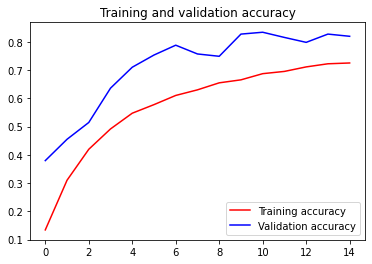

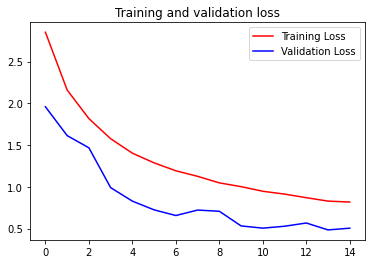

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy'] ### YOUR CODE HERE
val_acc = history.history['val_accuracy'] ### YOUR CODE HERE
loss = history.history['loss'] ### YOUR CODE HERE
val_loss = history.history['val_loss'] ### YOUR CODE HERE

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()